# Project Part 4: Hypothesis / AB Testing

*Name*: Enter here

In this assignment, we will continue the semester-long project that you have started in previous assignments. We will now perform hypothesis testing/AB testing with your dataset. Unlike previous sections, we've provided an example run-through of hypothesis testing and AB testing using one of the provided datasets. Hopefully, you can apply the techniques we use to your own data.  

**Sections 1 and 2 of this notebook will be the example runthroughs. If you have a good idea of how you want to test your data, feel free to skip to Section 3!**

In [133]:
import numpy as np
import pandas as pd
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

## Loading your Dataset

In [134]:
tips = pd.read_csv('tips.txt')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [135]:
tips.shape

(244, 7)

## Section 1: Hypothesis Testing Runthrough

### Null and Alternative Hypothesis 

**Null Hypothesis:** Proportion of tips to total_bill is 0.15. 

**Alternative Hypothesis:** Proportion of tips to total_bill is not 0.15. 

### Test Statistic

Recall from lecture, a **test statistic** is a single value that contains information about the data of a particular sample that is relevant to deciding whether to reject or fail to reject the null hypothesis. 

Over here, we can use the absolute difference between the average tip proportion in our sample dataset and the value we expect it to be if the null hypothesis was true i.e. 0.15

In [136]:
# Returns the absolute difference the average of a sample and the null hyopthesis value
def statistic(sample_mean): 
    return abs(sample_mean - 0.15)

### Simulation
#### <span style='color: red'> Reminder: Always simulate under null hypothesis!! </span>

We are gonna be using the sample_proportions function to simulate our coin tosses. The details of the function are given in the lecture slides. We create an array that holds our proportions- we expect the tip proportion to be 0.15, so our proportions are 0.15 and 0.85. In this scenario, we only care about the first element of the array i.e. 0.15. We also run the simulation on a sample size of 244, which is the same size as our dataframe.

The following demonstrates one simulation of the average tip proportion of 244 people:

In [137]:
model_proportions = make_array(0.15,0.85)
number_people = 244
one_simulation = sample_proportions(number_people, model_proportions)
one_simulation

array([0.15983607, 0.84016393])

We want to repeat this simulation 10000 times. We use a for loop to do this as shown below. We then store our test statistic for every simulation in **simulated_null_statistics** i.e The absolute difference between each sample statistic and our null hypothesis. Again, we do this assuming that our null hypothesis is true i.e. the model proportions are (0.15, 0.85)

In [138]:
simulated_null_statistics = make_array()
for _ in np.arange(10000):
    simulation = sample_proportions(number_people, model_proportions)
    # We are only interested in tips/total_bill, not (total_bill-tips)/total_bill
    simulated_null_statistics = np.append(simulated_null_statistics,
                                          statistic(simulation.item(0)))
simulated_null_statistics

array([0.00983607, 0.03852459, 0.02295082, ..., 0.00655738, 0.03114754,
       0.03934426])

Now we can find the average value of the absolute difference ... 

In [139]:
np.mean(simulated_null_statistics)

0.018230081967213114

And we can plot a histogram showing the variation in absolute difference

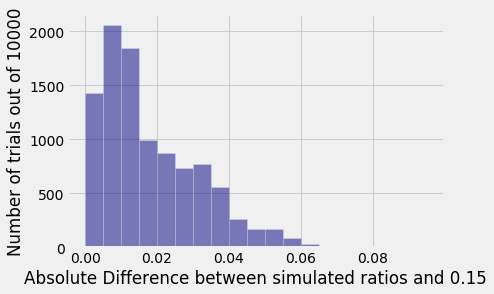

In [140]:
bins = np.arange(0, 0.1, 0.005)
plt.hist(simulated_null_statistics, bins, facecolor='#000080', alpha=0.5)
plt.xlabel('Absolute Difference between simulated ratios and 0.15')
plt.ylabel('Number of trials out of 10000')
plt.show()

### Observed Statistic for dataset

Now we compare the statistic we observe in the dataset to the distribution of our test statistics

First, we find the average tip proportion in our dataset and store it

In [141]:
average_tip_proportion = (tips["tip"]/tips["total_bill"]).mean()
average_tip_proportion

0.16080258172250472

Next, we convert this average into a statistic and plot this on the variation graph

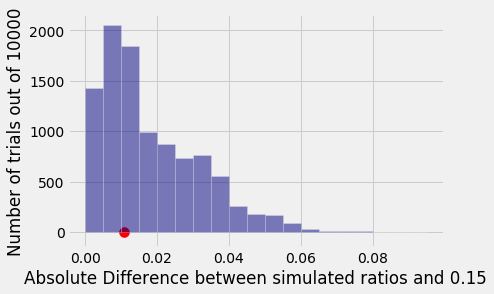

In [142]:
observed_statistic = statistic(average_tip_proportion)
bins = np.arange(0, 0.1, 0.005)
plt.hist(simulated_null_statistics, bins, facecolor='#000080', alpha=0.5)
plt.xlabel('Absolute Difference between simulated ratios and 0.15')
plt.ylabel('Number of trials out of 10000')
plt.scatter(observed_statistic, 0, color='red', s=100);

We can see from the plot that we are **extremely likely** to get a proportion corresponding to the one observed from the simulations purely by chance. Therefore it is unlikely that our observations from this sample could lead to rejection of the null hypothesis. In order to verify this, we move on to **Computing the P value and significance testing**

### Computing P Value and testing significance

Selecting **significance level** (α) = 0.05

The P Value gives us the probability of getting the observed statistic for the dataset purely by chance **if the null hypothesis is true**. If our P Value is below the significance level, then we have sufficient evidence to conclude that it is highly unlikely our observed statistic is purely by chance and suggests that we can reject the null hypothesis. If the P Value is above the significance level, then it is likely that our result occurs merely by chance and we do not have sufficicent evidence to reject the null hypothesis- **i.e. we fail to reject the null hypothesis**

We calculate the P Value by calculating the area to the right of the red dot on the graph, in this case, we can count all values that have a test statistic greater than or equal to the observed statistic and divide it by the length of the dataset.

In [143]:
proportion_greater_or_equal = sum(simulated_null_statistics >= observed_statistic)/len(simulated_null_statistics)
proportion_greater_or_equal 

0.586

We see that our calculated P Value = 0.5881 >  0.05 (α). Therefore, **we fail to reject the null hypothesis**

Now assume we have a dataset that gives us an observed statistic of 0.045 i.e. the absolute difference between the observed statistic and 0.15 is 0.045

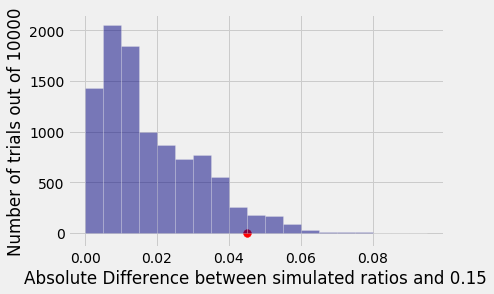

In [144]:
second_observed_statistic = 0.045
observed_statistic = statistic(average_tip_proportion)
bins = np.arange(0, 0.1, 0.005)
plt.hist(simulated_null_statistics, bins, facecolor='#000080', alpha=0.5)
plt.xlabel('Absolute Difference between simulated ratios and 0.15')
plt.ylabel('Number of trials out of 10000')
plt.scatter(second_observed_statistic, 0, color='red', s=60);

We see that the area to the right of the red point is very small, suggesting that our observation may lead to us rejecting the null hypothesis. Continuing with α = 0.05, we calculate the P Value:

In [145]:
second_proportion_greater_or_equal = sum(simulated_null_statistics >= second_observed_statistic)/len(simulated_null_statistics)
second_proportion_greater_or_equal

0.0491

Notice that the P Value = 0.0462 < 0.05 (α). This is sufficient to reject our null hypothesis!

<span style='color:red'> Notice that we don't "prove" either the null or alternative hypothesis. The only things we can do in a hypothesis test is reject or fail to reject our null hypothesis</span>

## Section 2: A/B Testing Runthrough 

### Null and Alternative Hypothesis

**Null Hypothesis:** Whether a person smokes or not **does not** affect the amount they tip. 

**Alternative Hypothesis:** Whether a person smokes or not **does** affect the amount they tip. 

### Test Statistic

 **Test statistic:** absolute difference between average of proportion of tip for smokers and that of non-smokers.

In [152]:
def statistic(avg_tip_smoker, avg_tip_nonsmoker): 
    return abs(avg_tip_smoker - avg_tip_nonsmoker);

### Simulation 


**Remember to always simulate under the null hypothesis!**

Recall in the *Hypothesis Testing* section, we simulated under the null using sample_proportions() from the data science module. Simulating under the null for AB Testing will take on a different approach that we will outline here. 

Instead of sample_proportions, we will use the **sample()** function. This function returns a random sample of items from the dataframe it is called on. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) is the full documentation. 


**Follow these steps!**

1. Use sample() to take a random sample of size n (number of rows in our data) without replacement for the *smoker* column. We are essentially shuffling the rows of our dataset. 

2. Make a new column for the shuffled labels and drop the original *smoker* label. Doing this assigns a random smoker label to proportion_tips, simulating under the null that there is no association between *smoker* and *proportion_tips*.

3. Calculate the null statistic 

In [153]:
#SETUP. Run this cell. 
tips['proportion_tips'] = tips['tip'] / tips['total_bill']
example = tips

In [154]:
#Step 1
#Notice the difference in the two outputted column series. The rows are shuffled!
shuffled_labels = example['smoker'].sample(n = len(example.index)).reset_index()['smoker']
non_shuffled_labels = example['smoker']

#run this multiple times and you will see the output of shuffled_labels changes.
display(shuffled_labels.head())
display(non_shuffled_labels.head())

0     No
1     No
2    Yes
3    Yes
4     No
Name: smoker, dtype: object

0    No
1    No
2    No
3    No
4    No
Name: smoker, dtype: object

In [155]:
#Step 2
#Each row in example has a new 'smoker' status. 
example['Shuffled Smoker'] = shuffled_labels
example = example.drop(columns = 'smoker')
example.head()

,total_bill,tip,sex,day,time,size,proportion_tips,Shuffled Smoker
0,16.99,1.01,Female,Sun,Dinner,2,0.059447,No
1,10.34,1.66,Male,Sun,Dinner,3,0.160542,No
2,21.01,3.50,Male,Sun,Dinner,3,0.166587,Yes
3,23.68,3.31,Male,Sun,Dinner,2,0.139780,Yes
4,24.59,3.61,Female,Sun,Dinner,4,0.146808,No


In [156]:
#Step 3
example = example[['proportion_tips', 'Shuffled Smoker']].groupby('Shuffled Smoker').agg(np.mean)
null_statistic = statistic(example.loc['No', 'proportion_tips'], example.loc['Yes', 'proportion_tips'])
null_statistic

0.0008193008514210398

The **simulate_null_statistic()** function below simulates ONE statistic under the null. This function combined the steps we went over above.

In [157]:
def simulate_null_statistic():
    shuffled_labels = tips['smoker'].sample(n = len(tips.index)).reset_index()['smoker']
    tips['Shuffled Smoker'] = shuffled_labels
    updated_tips = tips.drop(columns = 'smoker')
    updated_tips = updated_tips[['proportion_tips', 'Shuffled Smoker']].groupby('Shuffled Smoker').agg(np.mean)
    return statistic(updated_tips.loc['Yes', 'proportion_tips'], updated_tips.loc['No', 'proportion_tips'])

simulate_null_statistic()

0.015294969542649361


Simulate statistics under the null 10000 times and store it in the **simulated_null_statistics** array.

In [158]:
simulated_null_statistics = np.array([])
for _ in np.arange(10000):
    null_statistic = simulate_null_statistic()
    simulated_null_statistics = np.append(simulated_null_statistics, null_statistic)
simulated_null_statistics

array([0.00281831, 0.00742231, 0.00708322, ..., 0.01071967, 0.00283697,
       0.00586729])

### Observed Statistic

In [159]:
grouped_by_smoker = tips[['smoker', 'proportion_tips']].groupby('smoker').agg(np.mean) 

#Now, we can use the statistic function we defined earlier to calculate observed statistic. 
observed_statistic = statistic(grouped_by_smoker.loc['Yes', 'proportion_tips'], grouped_by_smoker.loc['No', 'proportion_tips'])
observed_statistic

0.003867582457662583

### Visualization 

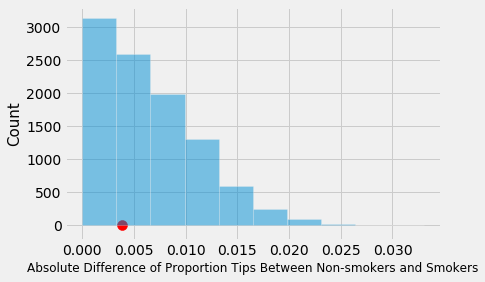

In [160]:
plt.hist(simulated_null_statistics, alpha = 0.5)
plt.xlabel('Absolute Difference of Proportion Tips Between Non-smokers and Smokers', fontsize = 12)
plt.ylabel('Count', fontsize = 15)
plt.scatter(observed_statistic, 0, color = 'red', s = 100)

### P-Value and Significance Intepretation

In [161]:
p_value = sum(simulated_null_statistics >= observed_statistic) / len(simulated_null_statistics)
p_value

0.6364

**Significance level** (α) = 0.05

<span style='color:red'>Because our p-value, 0.651, is greater than 0.05 we fail to reject the null hypothesis. There is not enough statistical evidence to suggest that non-smokers and smokers tip differently</span>

## Section 3: Do it on your own dataset! 

This is a repeat of Sections 1 and 2 but you will be importing your own data and performing either Hypothesis or A/B Testing. 

By now, you should have your dataset from the internet. It will likely be in the form of a csv, tsv, or JSON file type. If it isn't one of these, contact a TA. Feel free to use our code from Sections 1 and 2 as a reference, however you must come up with your own null and alternative hypotheses and perform your own statistical analysis on it

In [162]:
## Load your own dataset here



### Null and Alternative Hypothesis 


**Null hypothesis:** TYPE YOUR ANSWER HERE

**Alternative hypothesis:** TYPE YOUR ANSWER HERE

### Test Statistic

Write, in words, what you want to use as your **test statistic**

TYPE YOUR ANSWER HERE

Now, implement a function that computes your test statistic. 

In [163]:
def statistic(*args): 
    return ... 

### Simulation 

Implement a function that computes ONE statistic simulated under the null. 

In [164]:
def simulate_null_statistic():
    return ...

Simulate null statistic 10000 times

In [165]:
...

Ellipsis

### Observed Statistic

Determine your observed statistic based on the feature/features you've selected.

In [166]:
observed_statistic = ...
observed_statistic 

Ellipsis

### P-Value and Interpretation

Make a histogram with your simulated null statistics and observed statistic

In [167]:
... 

Ellipsis

Calculate p-value. 

In [168]:
... 

Ellipsis

Intepret p-value with significance level of 0.05. 

TYPE YOUR ANSWER HERE

### CONGRATULATIONS! 

You are done with this part 4 of the project :) 